# 6.3 Softmax Pytorch

## Preparation

In [1]:
# Import the libraries we need for this lab

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from torch import optim
from torch.utils.data import DataLoader, Dataset

In [2]:
# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [3]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

## Load Data

In [4]:
# Create a train set
train_dataset = dsets.MNIST(root = './data', train=True, download=True, 
                            transform=transforms.ToTensor())

In [5]:
# Create a validation set
val_dataset = dsets.MNIST(root = './data', train=False, download=True, 
                            transform=transforms.ToTensor())

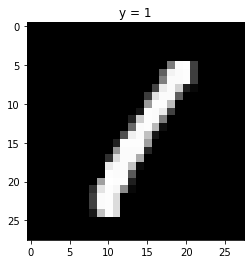

In [6]:
show_data(train_dataset[3])

## Create Model

In [19]:
# Define a Softmax classifier class
class SoftMax(nn.Module):
    # Constructor
    def __init__(self, in_size, out_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)
        
    #Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [20]:
# Create a model
model = SoftMax(28*28, 10)

In [21]:
# Print the Parameters
print('w: ', list(model.parameters())[0].size())
print('b: ', list(model.parameters())[1].size())

w:  torch.Size([10, 784])
b:  torch.Size([10])


In [22]:
# Create the loss function
criterion = nn.CrossEntropyLoss()

In [23]:
# Create a optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [24]:
# Create another value
n_epochs = 10
accuracy_list = []
loss_list = []

In [25]:
# Create the train_loader and val_loader
train_loader = DataLoader(dataset=train_dataset, batch_size=1)
validation_loader = DataLoader(dataset=val_dataset, batch_size=1)

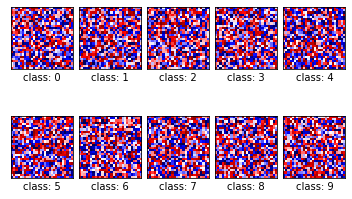

In [26]:
PlotParameters(model)

## Train Model

In [35]:
# Define the train Model
def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            # zero the optimizer
            optimizer.zero_grad()
            
            # Ptediction
            z = model(x.view(-1, 28*28))
            
            # Loss function
            loss = criterion(z, y)
            loss.backward()
            
            # Optimized
            optimizer.step()
            
        # Define the crrect before procedure
        correct = 0
        for x_val, y_val in validation_loader:
            z_val = model(x.view(-1, 28*28))
            _, yhat = torch.max(z_val.data, 1)
            correct = correct + (yhat == y_val).sum().item()
    
        # Record the data
        accuracy = correct / len(val_dataset)
        accuracy_list.append(accuracy)
        loss_list.append(loss.data)

In [36]:
train_model(n_epochs)

## Plot the Result

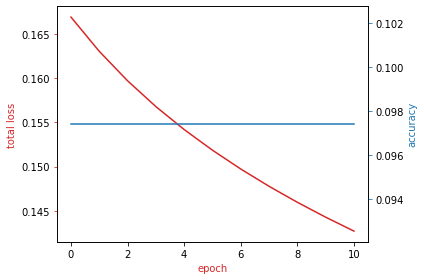

In [37]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

## Test the Model

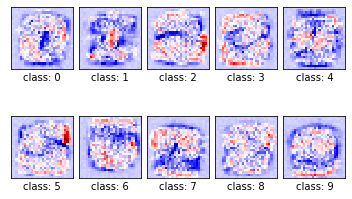

In [38]:
PlotParameters(model)

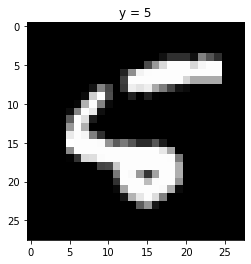

yhat: tensor([6])
probability of class  0.9958770275115967


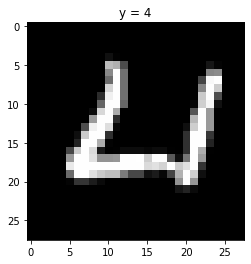

yhat: tensor([6])
probability of class  0.7204363942146301


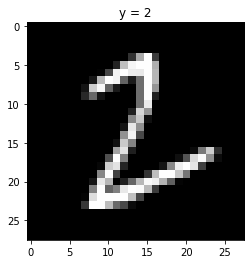

yhat: tensor([3])
probability of class  0.6412865519523621


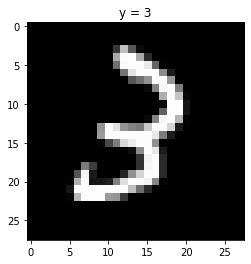

yhat: tensor([2])
probability of class  0.8478960394859314


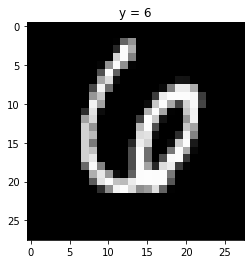

yhat: tensor([2])
probability of class  0.43020740151405334


In [39]:
Softmax_fn = nn.Softmax(dim = -1)
count = 0
for x, y in val_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break   

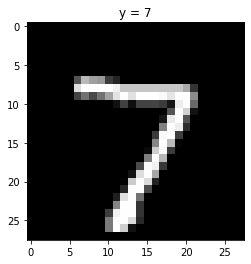

yhat: tensor([7])
probability of class  0.9989610910415649


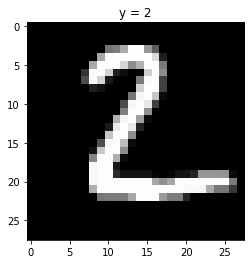

yhat: tensor([2])
probability of class  0.9697959423065186


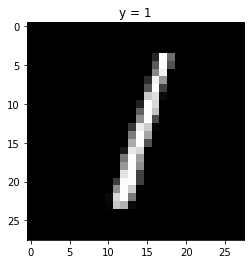

yhat: tensor([1])
probability of class  0.9980581402778625


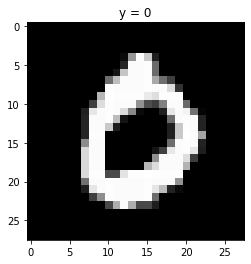

yhat: tensor([0])
probability of class  0.9999947547912598


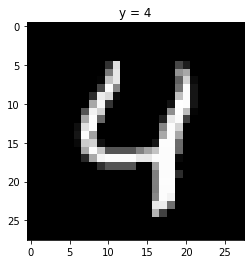

yhat: tensor([4])
probability of class  0.9262055158615112


In [60]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in val_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  

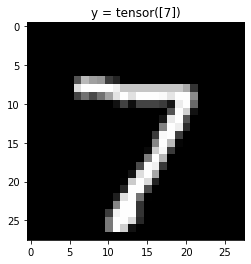

yhat:  tensor([7])
Probability: 0.9988107681274414


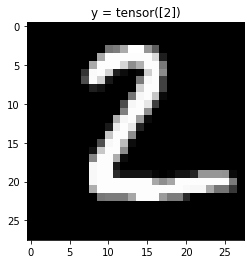

yhat:  tensor([2])
Probability: 0.964771568775177


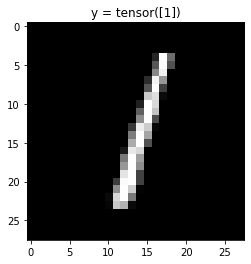

yhat:  tensor([1])
Probability: 0.9959523677825928


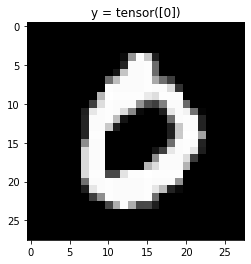

yhat:  tensor([0])
Probability: 0.9999837875366211


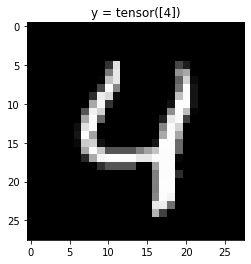

yhat:  tensor([4])
Probability: 0.9529001712799072


In [43]:
# Plot the classified samples

Softmax_fn = nn.Softmax(dim = -1)
count = 0
for x, y in validation_loader:
    z  = model(x.reshape(-1, 28*28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print('yhat: ', yhat)
        print('Probability:', torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break